In [2]:
from matplotlib.pyplot import imshow, draw, pause
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
import argparse
import numpy as np


class AnimatedGif:
    def __init__(self, size=(800, 600)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []

    def add(self, image, label=''):
        plt_im = plt.imshow(image, cmap='coolwarm', animated=True)
        plt_txt = plt.text(10, 10, label, color='red')
        self.images.append([plt_im, plt_txt])

    def save(self, filename, fps):
        ani = animation.ArtistAnimation(self.fig, self.images)
        ani.save(filename, writer='imagemagick', fps=fps)

MovieWriter imagemagick unavailable; using Pillow instead.


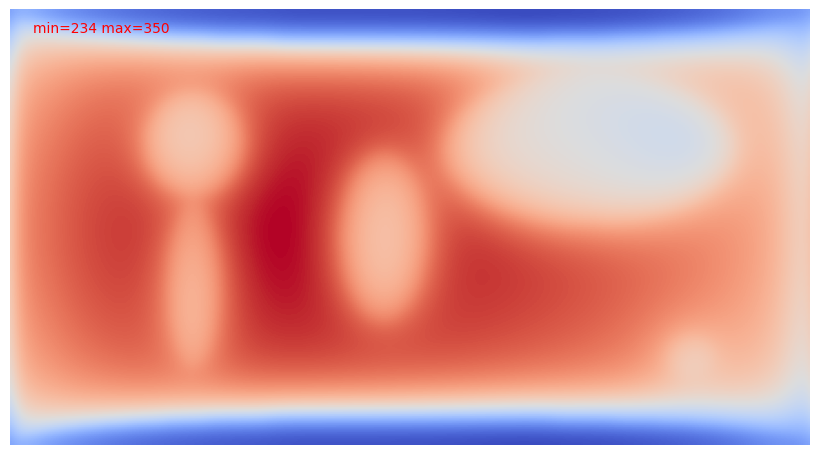

In [20]:
input_hdf5_file = 'out_par0.hdf5'
output_video_file = 'par0.gif'
fps = 10
with h5py.File(input_hdf5_file, 'r') as f:
    video = AnimatedGif()
    for frame_id in sorted([int(k) for k in f.keys()]):
        Frame = np.array(f[str(frame_id)]['/%d/world' % frame_id])
        frame = np.zeros_like(Frame)
        flat = Frame.flatten()
        for i in range(4):
            for j in range(4):
                ftemp = np.reshape(flat[(i+4*j)*90*49:(i+4*j+1)*90*49],(49,90))
                frame[49*j:49*(j+1),90*i:90*(i+1)] = ftemp
        label = "min="+str(int(frame.min()))+" max="+str(int(frame.max()))
        video.add(frame, label=label)
    video.save(output_video_file, fps)

In [17]:
4410/90

49.0

In [5]:
with h5py.File(input_hdf5_file, 'r') as f:
    for frame_id in range(1):
        frame = np.array(f[str(frame_id)]['/%d/world' % frame_id])
frame.

293.47426060367314